머신 러닝에서 텍스트 분류. 그 중에서도 특히, 감성 분류를 연습하기 위해 자주 사용하는 데이터가 있습니다. 바로 영화 사이트 IMDB의 리뷰 데이터입니다. 이 데이터는 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터입니다.

스탠포드 대학교에서 2011년에 낸 논문에서 이 데이터를 소개하였으며, 당시 논문에서는 이 데이터를 훈련 데이터와 테스트 데이터를 50:50대 비율로 분할하여 88.89%의 정확도를 얻었다고 소개하고 있습니다.

논문 링크 : http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf

케라스에서는 해당 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 바로 다운로드 할 수 있도록 지원하고 있습니다. 케라스로부터 해당 데이터를 다운로드 받아 감성 분류를 수행하는 모델을 만들어보겠습니다.

#1. IMDB 리뷰 데이터에 대한 이해

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb

영화 리뷰 데이터를 갖고오겠습니다. 케라스에서 제공하는 IMDB 리뷰 데이터는 앞서 배운 로이터 뉴스 데이터에서 훈련 데이터와 테스트 데이터를 우리가 직접 비율을 조절했던 것과는 달리 이미 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공합니다. 

In [7]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(X_train, y_train), (X_test, y_test) = imdb.load_data()       # x: 단어 등장 빈도수에 맞춰 전처리된 데이터, y : 카테고리 (감정 정보 1 긍정 0 부정)

# imdb.data_load()의 파라미터로 num_words를 사용하면 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지를 사용할 것인지를 의미합니다. 예를 들어서 10,000을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용하게 됩니다. 즉, 단어 집합의 크기는 10,000이 됩니다. 지금은 별도로 제한하지 않겠습니다.
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

훈련용 리뷰의 개수, 테스트용 리뷰의 개수, 카테고리의 수를 출력하는 코드입니다.

y_train는 0부터 시작해서 레이블을 부여하므로, y_train에 들어 있는 가장 큰 수에 +1을 하여 출력하면 카테고리가 총 몇 개인지를 알 수 있습니다. 훈련용 리뷰는 25,000개, 테스트용 리뷰는 25,000개, 카테고리는 2개입니다.

In [8]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


훈련 데이터가 어떻게 구성되어있는지를 확인하기 위해 첫번째 훈련용 리뷰를 출력해보았습니다. 다시 말해, 25,000개의 영화 리뷰 중 첫번째 리뷰 텍스트와 그 리뷰에 대한 레이블을 출력해보는 것입니다.

In [9]:
print(X_train[0]) # 첫번째 리뷰에 담긴 단어들이 빈도수에 맞게 매칭된 배열
print(y_train[0]) # 첫번째 리뷰의 정답 : 긍정 or 부정

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


첫번째 훈련용 리뷰(X_train[0], y_train[0])에서 리뷰 본문에 해당하는 X_train[0]에는 숫자들이 들어있습니다. 이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태입니다. IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했습니다. 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높습니다. 위에서 단어 집합의 크기를 제한하지 않았기 때문에 22,665와 같은 큰 숫자도 보입니다.

첫번째 훈련용 리뷰의 레이블에 해당하는 y_train[0]의 값은 1입니다. 이 값은 첫번째 훈련 데이터가 2개의 카테고리 중 1에 해당하는 카테고리임을 의미합니다. 이 예제의 경우 감성 정보로서 0 또는 1의 값을 가지는데, 이 경우에는 긍정을 의미하는 1의 값을 가집니다.

25,000개의 훈련용 리뷰의 각 길이는 전부 다른데, 리뷰의 길이 분포를 그래프로 시각화해보겠습니다.

> 참고 : 리스트 안에 내포된 for문 : https://wikidocs.net/22#_1

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364
[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120

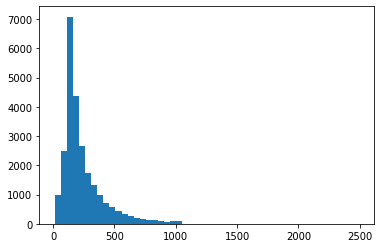

In [10]:
len_result = [len(s) for s in X_train] 

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

print(len_result)
plt.subplot(1,1,1)
plt.hist(len_result, bins=50)
plt.show()

대체적으로 1,000이하의 길이를 가지며, 특히 100~500길이를 가진 데이터가 많은 것을 확인할 수 있습니다. 반면, 가장 긴 길이를 가진 데이터는 길이가 2,000이 넘는 것도 확인할 수 있습니다. 레이블의 분포를 확인해보겠습니다.
(즉 부정 감정, 긍정 감정 몇 개 인지 count)

In [11]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


25,000개의 리뷰가 존재하는데 두 레이블 0과 1은 각각 12,500개로 균등한 분포를 가지고 있습니다.

 X_train에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인해보겠습니다. imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장되어져 있습니다. 주의할 점은 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수입니다. ( 아래 설명할 특별 토큰 때문)이것은 IMDB 리뷰 데이터셋에서 정한 규칙입니다.

In [12]:
word_to_index = imdb.get_word_index()
index_to_word={} # 인덱스로 단어를 알아내기 위해 key 값 (단어)를 index 와 바꾸기
for key, value in word_to_index.items():
    index_to_word[value+3] = key

index_to_word에 인덱스를 집어넣으면 전처리 전에 어떤 단어였는지 확인할 수 있습니다. IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있습니다. 그래서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어입니다.

In [13]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))


빈도수 상위 1등 단어 : the


In [14]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))


빈도수 상위 3938등 단어 : suited


이 데이터에서 빈도가 가장 높은 단어는 the이고, 빈도가 3938번째로 높은 단어는 suited입니다.

첫번째 훈련용 리뷰의 X_train[0]이 인덱스로 바뀌기 전에 어떤 단어들이었는지 확인해보겠습니다.

In [15]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):     # pad sos unk : https://github.com/nicolas-ivanov/tf_seq2seq_chatbot/issues/15
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]])) # 빈 문자열에 추가 추가 추가..

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

# 2. GRU로 IMDB 리뷰 감성 분류하기

### pad_sequence() 

전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있습니다. 또는 각 문서 또는 각 문장은 단어의 수가 제각각입니다. 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있습니다. 이를 자연어 처리에서는 패딩(padding) 작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줍니다. 케라스에서는 pad_sequence()를 사용합니다. pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

```python
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')
# 전처리가 끝나서 각 단어에 대한 정수 인코딩이 끝났다고 가정하고, 3개의 데이터를 입력으로 합니다.
array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)
```

- 첫번째 인자 = 패딩을 진행할 데이터
- maxlen = 모든 데이터에 대해서 정규화 할 길이
- padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

### 단어 임베딩

 워드 임베딩이란 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말합니다. 밀집 벡터가 무엇일까요? 이미 배운 개념인 원-핫 벡터와 비교해봅시다. 원-핫 벡터는 대부분이 0의 값을 가지고, 단 하나의 1의 값을 가지는 벡터였습니다.

```
Ex) [0 1 0 0 0 0 ... 중략 ... 0 0 0 0 0 0 0] # 차원이 굉장히 크면서 대부분의 값이 0
```

대부분의 값이 0인 이러한 벡터를 희소 벡터(sparse vector)라고 합니다. 원-핫 벡터는 희소 벡터의 예입니다. 원-핫 벡터는 단어의 수만큼 벡터의 차원을 가지며 단어 간 유사도가 모두 동일하다는 단점이 있습니다. 

반면, 희소 벡터와 표기상으로도 의미상으로도 반대인 벡터가 있습니다. 대부분의 값이 실수이고, 상대적으로 저차원인 밀집 벡터(dense vector)입니다. 아래는 밀집 벡터의 예입니다.

```
Ex) [0.1 -1.2 0.8 0.2 1.8] # 상대적으로 저차원이며 실수값을 가짐
```

단어를 원-핫 벡터로 만드는 과정을 원-핫 인코딩이라고 하였습니다. 이와 대비적으로 단어를 밀집 벡터로 만드는 작업을 워드 임베딩(word embedding)이라고 합니다. 밀집 벡터는 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고도 합니다. 원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다.

#### Embedding()

Embedding()은 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다. Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행합니다.

- 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
- input_length = 입력 시퀀스의 길이

e.g.)

```
# 문장 토큰화와 단어 토큰화
text=[['Hope', 'to', 'see', 'you', 'soon'],['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다.
Embedding(7, 2, input_length=5)
# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다.

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embeddig()은 각 단어에 대해 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+
```

In [16]:
import re # 정규표현식
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences   # 모델이 처리할 수 있도록 길이를 동일하게 조정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding           # DNN-GRU, Embeddin
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

단어 집합의 크기를 10,000으로 제한합니다.

In [17]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

리뷰 최대 길이는 500으로 제한합니다.

각 리뷰는 문장의 길이가 다르기 때문에, 모델이 처리할 수 있도록 길이를 동일하게 해주어야 합니다. 이때 사용하는 것이 pad_sequences()입니다. 길이는 max_len에 넣는 값으로 정해집니다. 훈련 데이터가 정한 길이를 초과하면 초과분을 삭제하고, 부족하면 0으로 채웁니다.

In [18]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

Embedding()은 두 개의 인자를 받는데, 첫번째 인자는 단어 집합의 크기이며 두번째 인자는 임베딩 후의 벡터 크기입니다. 여기서는 100을 선택했습니다. 즉, 입력 데이터에서 모든 단어는 100차원의 임베딩 벡터로 표현됩니다.

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, 100)) # 총 vocab_size 만큼의 단어를 학습, Embedding 된 벡터는 100차원으로 표현(출력)
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

검증 데이터의 손실(loss)이 증가하면, 과적합 징후이므로 검증 데이터 손실이 4회 증가하면 학습을 중단하는 조기 종료(EarlyStopping)를 사용합니다. 또한, ModelCheckpoint를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우에만 모델을 저장하도록 합니다.

이진 분류이므로 출력층은 뉴런 하나와 활성화 함수로 시그모이드 함수를 사용합니다.

In [20]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)   # val_loss가 min이 되는 시기가 4번 일어나면 stop
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, callbacks=[es, mc], batch_size=60, validation_split=0.2)   # 시간 관계상 epochs=5 (15~20 권장)

Epoch 1/5
334/334 [==============================] - ETA: 0s - loss: 0.4854 - acc: 0.7644
Epoch 00001: val_acc improved from -inf to 0.76220, saving model to GRU_model.h5
334/334 [==============================] - 258s 772ms/step - loss: 0.4854 - acc: 0.7644 - val_loss: 0.4889 - val_acc: 0.7622
Epoch 2/5
334/334 [==============================] - ETA: 0s - loss: 0.3048 - acc: 0.8766
Epoch 00002: val_acc improved from 0.76220 to 0.87460, saving model to GRU_model.h5
334/334 [==============================] - 245s 733ms/step - loss: 0.3048 - acc: 0.8766 - val_loss: 0.3106 - val_acc: 0.8746
Epoch 3/5
334/334 [==============================] - ETA: 0s - loss: 0.2430 - acc: 0.9064
Epoch 00003: val_acc did not improve from 0.87460
334/334 [==============================] - 246s 736ms/step - loss: 0.2430 - acc: 0.9064 - val_loss: 0.3112 - val_acc: 0.8694
Epoch 4/5
334/334 [==============================] - ETA: 0s - loss: 0.1900 - acc: 0.9304
Epoch 00004: val_acc improved from 0.87460 to 0.89

```
... 중략 ...
Epoch 00009: val_acc did not improve from 0.89620
25000/25000 [============================] - 23s 928us/sample - loss: 0.0582 - acc: 0.9812 - val_loss: 0.4018 - val_acc: 0.8842
Epoch 00009: early stopping
```

저자의 경우, 조기 종료 조건에 따라서 에포크 9회에서 조기 종료되었습니다. 훈련이 다 되었다면 이제 테스트 데이터에 대해서 정확도를 평가할 차례입니다. 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드합니다

In [22]:
loaded_model = load_model('/content/GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 78s 100ms/step - loss: 0.3789 - acc: 0.8876

 테스트 정확도: 0.8876


테스트 데이터에 대해서 정확도 88.93%를 얻습니다. 임의의 문장에 대해서 리뷰의 긍, 부정을 예측하고자 합니다. 이를 위해서는 모델에 넣기 전에 임의의 문장에 대해서 전처리를 해주어야 합니다. sentiment_predict은 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴하는 함수입니다.

In [23]:
def sentiment_predict(new_sentence):
  # 정규표현식 : 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

  # 문장 속 각 단어를 정수 인코딩
  encoded = []
  for word in new_sentence.split():
    # 단어 집합의 크기를 10,000으로 제한.
    try :
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
    # 10,000 이상의 숫자는 <unk> 토큰으로 취급.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 취급.
    except KeyError:
      encoded.append(2)

  pad_new = pad_sequences([encoded], maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

IMDB 사이트에 접속해서 영화 블랙팬서의 1점 리뷰를 가져왔습니다. 부정으로 제대로 예측하는지 테스트해보겠습니다.



In [24]:
temp_str = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(temp_str)

96.11% 확률로 부정 리뷰입니다.


IMDB 사이트에 접속해서 영화 어벤져스의 10점 리뷰를 가져왔습니다. 긍정으로 제대로 예측하는지 테스트해보겠습니다.



In [25]:
temp_str = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(temp_str)

99.92% 확률로 긍정 리뷰입니다.
